<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/Simulacion_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/literacy_rates.csv"
df = pd.read_csv(filename)

1. Limpieza de Datos

In [2]:
# A continuacion revisaremos aquellos datos nulos para ver la integridad de la informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         4950 non-null   object
 1   Country        4955 non-null   object
 2   Year           4955 non-null   int64 
 3   Age            4955 non-null   object
 4   Gender         4955 non-null   object
 5   Literacy rate  4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.4+ KB


In [3]:
# Revisaremos los primero diez datos para dimensionar la magnitud de la info
df.head(10)

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
5,Central and Southern Asia,Afghanistan,2011,15-24,total,0.46990049999999994
6,Central and Southern Asia,Afghanistan,2011,25-64,female,0.08412760000000001
7,Central and Southern Asia,Afghanistan,2011,25-64,male,0.3779481
8,Central and Southern Asia,Afghanistan,2011,25-64,total,0.2315362
9,Central and Southern Asia,Afghanistan,2011,65+,female,0.19670490000000002


In [4]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("df_literacy_rates.xlsx", index=False)

In [5]:
#Lo primero que logramos visualizar son elementos nulos para las regiones para los paises de Afghanistan y Uzbekistan (cuya region es unica por pais), por lo que rellenaremos esta info en nuestro Dataframe
df2=df
df2["Region"].fillna("Central and Southern Asia", inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         4955 non-null   object
 1   Country        4955 non-null   object
 2   Year           4955 non-null   int64 
 3   Age            4955 non-null   object
 4   Gender         4955 non-null   object
 5   Literacy rate  4955 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.4+ KB


In [6]:
#Otro de los elementos que se logra visualizar como una potencial contaminacion de informacion, es el hecho que la columna "Literacy Rate" tenga la clasificacion de Objeto, siendo que es un ratio y se espera una clasificacion tipo float
df2['Literacy rate'] = df2['Literacy rate'].str.replace("%", "")
df2['Literacy rate'] = df2['Literacy rate'].replace(".", ",").astype(float)

In [7]:
#Habiendo realizado el cambio anterior, podemos validar que "Literacy Rate" paso de object a float64
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         4955 non-null   object 
 1   Country        4955 non-null   object 
 2   Year           4955 non-null   int64  
 3   Age            4955 non-null   object 
 4   Gender         4955 non-null   object 
 5   Literacy rate  4955 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 232.4+ KB


In [8]:
# A continuacion logramos visualizar que existe un valor mayor a 1, considerando que dichos valores son ratios, este es un dato que no podemos aceptar.
df2.describe()

,Year,Literacy rate
count,4955.000000,4955.000000
mean,2013.987891,0.826014
std,2.746204,0.674469
min,2010.000000,0.004025
25%,2011.000000,0.722854
50%,2014.000000,0.930689
75%,2016.000000,0.985112
max,2018.000000,45.384000


In [9]:
#A traves de este filtro podremos verificar que dato(s) esta generando dicho efecto y podremos reemplazarlo o eliminarlo dependiendo el
df3=df
literacy_filter=df3["Literacy rate"]>1
df3=df3.loc[literacy_filter,:]
df3

,Region,Country,Year,Age,Gender,Literacy rate
18,Central and Southern Asia,Afghanistan,2018,25-64,male,45.384


In [10]:
# En este caso asumiremos que el valor fue ingresado dentro del DF directamente como un valor expresado en %, distinto al resto que fue ingresado como un valor decimal, por lo que solo realizaremos el cambio de manera manual.
df2["Literacy rate"]=df2["Literacy rate"].replace([45.384],0.45384)
df2.describe()

,Year,Literacy rate
count,4955.000000,4955.000000
mean,2013.987891,0.816947
std,2.746204,0.232560
min,2010.000000,0.004025
25%,2011.000000,0.722507
50%,2014.000000,0.930676
75%,2016.000000,0.985078
max,2018.000000,1.000000


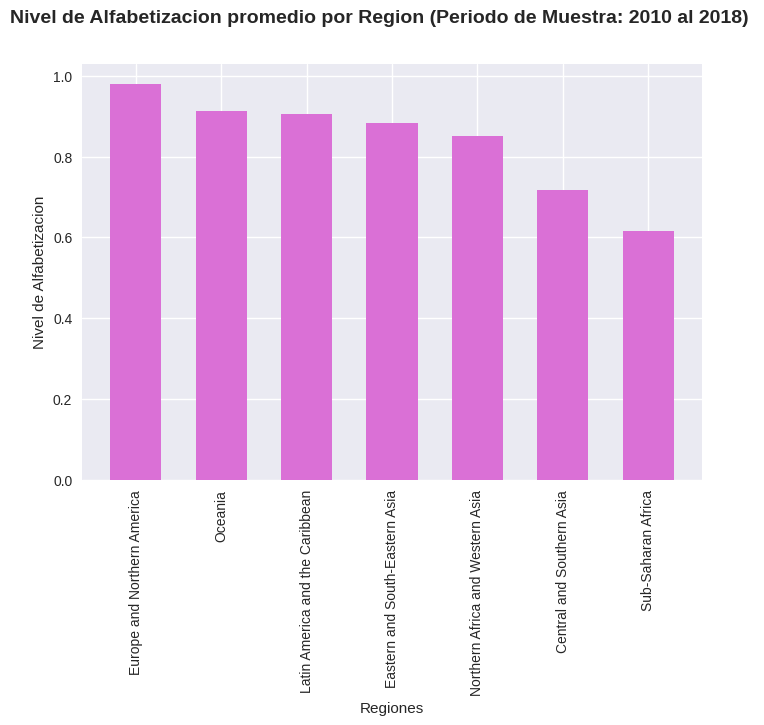

In [15]:
df4=df2
df4=df.groupby(['Region'])[['Literacy rate']].mean().reset_index().sort_values(by="Literacy rate",ascending=False)

import matplotlib.pyplot as plt
from numpy import arange
from numpy.random import randint

plt.style.use('seaborn')

fig1 = plt.figure(dpi=100)
fig1.suptitle("Nivel de Alfabetizacion promedio por Region (Periodo de Muestra: 2010 al 2018) ", fontsize=14, fontweight="bold", )

ax1 = fig1.add_subplot(111)
sep = 0.6
ax1.bar(df4["Region"],df4["Literacy rate"], sep, color='orchid')

plt.xticks(rotation=90)
plt.xlabel("Regiones")
plt.ylabel("Nivel de Alfabetizacion")

plt.show()

In [63]:
df5=df2

men_filter=df5["Gender"]=="male"
year1=df5["Year"]==2010
dfm=df5.loc[men_filter & year1,:]
dfm.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year             2010.000000
Literacy rate       0.838625
dtype: float64

In [64]:
df5=df2

women_filter=df5["Gender"]=="female"
year2010_filter=df5["Year"]==2010
dfw=df5.loc[women_filter & year2010_filter,:]
dfw.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year             2010.000000
Literacy rate       0.756214
dtype: float64

In [58]:
dfw["Literacy rate"].mean()

0.78103061125908

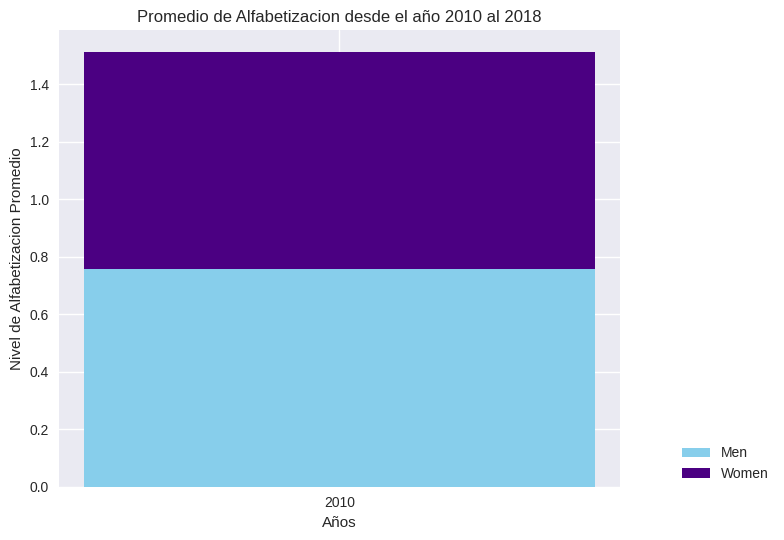

In [72]:


import matplotlib.pyplot as plt
import numpy as np
x= "2010"
y1= dfm["Literacy rate"].mean()
y2= dfw["Literacy rate"].mean()
fig1 = plt.figure(dpi=100)

plt.bar(x,y1,0.1,label="Men", color="skyblue")
plt.bar(x,y2,0.1,bottom=y2,label="Women", color="indigo")


plt.xlabel("Años")
plt.ylabel("Nivel de Alfabetizacion Promedio")
plt.title("Promedio de Alfabetizacion desde el año 2010 al 2018")

plt.legend(loc=(1.1,0))
plt.tight_layout()
plt.show()